In [5]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

Here, we will only discuss some relatiely simple methods, namely multilayer perceptrons for classification and regression. That can serve as a starting point for more involved deeping learning methods. Multilayer perceptron (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. 

In [7]:
#display(mglearn.plots.plot_logistic_regression_graph())

Text(0,0.5,'relu(x), tan(x)')

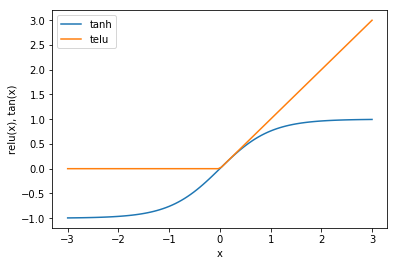

In [8]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line,0), label="telu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tan(x)")

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

C:\Users\hanfe\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'Feature 1')

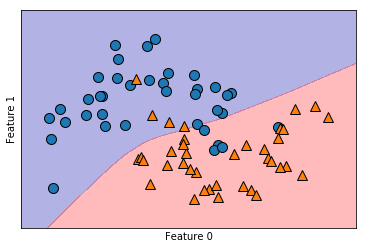

In [18]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

mlp = MLPClassifier( random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

By default, MLP uses 100 hidden nodes, which is quite a lot for this small dataset. We can reduce the number (which reducee the complexity of the model) and still get a good result.

C:\Users\hanfe\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'Feature 1')

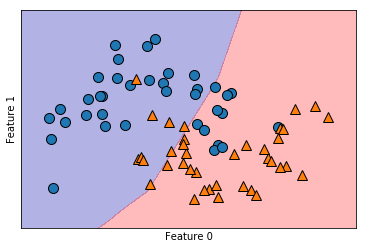

In [26]:
mlp = MLPClassifier( random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Add another hidden layer with 10 nodes.

C:\Users\hanfe\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'Feature 1')

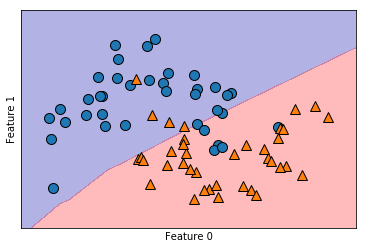

In [27]:
mlp = MLPClassifier( random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\hanfe\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'Feature 1')

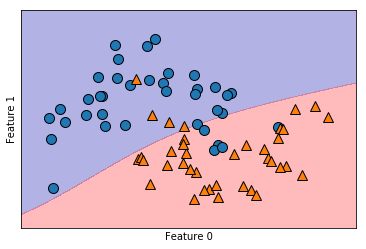

In [30]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier( random_state=0, activation='tanh',hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Finally, we can control the complexity of a neural network by using an L2 penalty to shrink the weights toward zero, as we did in ridge regression and the linear classifiers. The paramerter for this in the MLPClassifier is a alpha. It is set toa very low value (little regularization) be default. 

C:\Users\hanfe\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


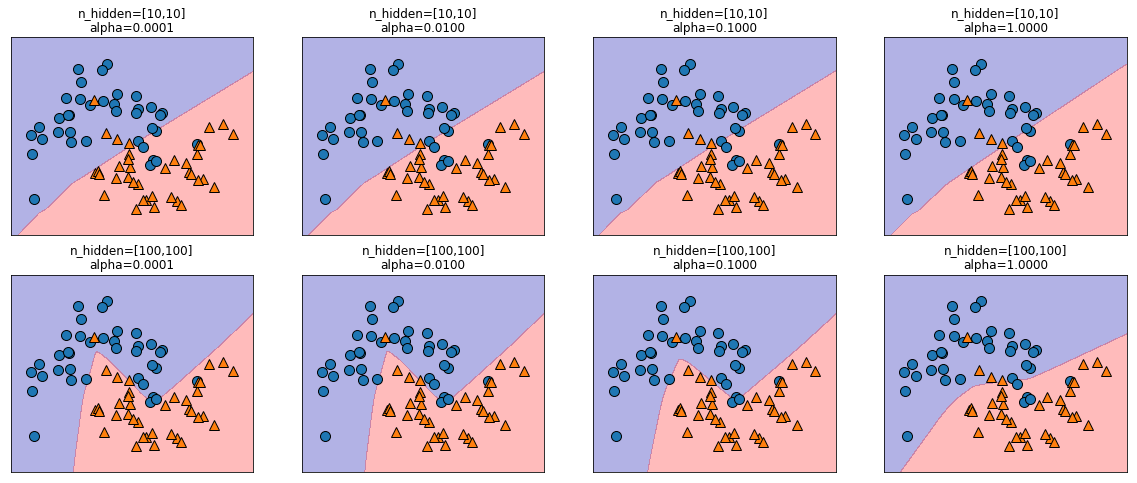

In [41]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax,alpha in zip(axx,[0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier( random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:,.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

Network with differet initial random numbers

C:\Users\hanfe\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


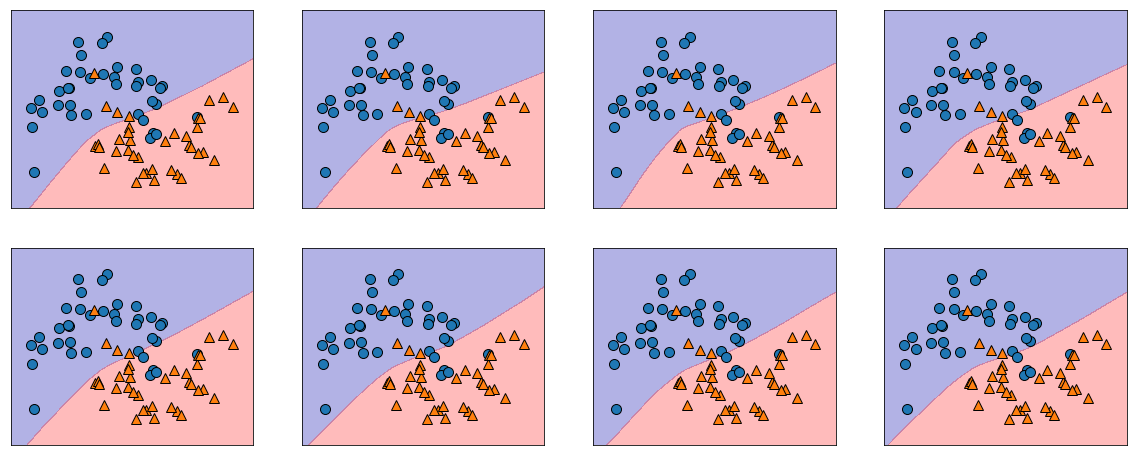

In [44]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(random_state=i)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=0.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train, ax=ax)

To get a better understanding of neural networks on real-world data, let's apply the MLPClassifier to the Breast Cancer dataset. We start with the default parameters:

In [61]:
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [63]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test,y_test)))

Accuracy on training set: 0.906
Accuracy on test set: 0.881


Neural networks also expect all input features to vary in a similarr way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements. Again, we will this by hand  here, but we'll introduce the StandardScaler to do this automatically.

In [76]:
#compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)

# compute the standard deviation of each feature on the training set 
std_on_train = X_train.std(axis=0)

#subtract the mean, and scale by inverse standard deviation, afterward, mean=0 and std=1
X_train_scaled = (X_train-mean_on_train)/std_on_train
# use the smae transformation (using training mean and std) on the test set
X_test_scaled = (X_test-mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test,y_test)))

Accuracy on training set:0.908
Accuracy on test set:0.909


In [77]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test,y_test)))

Accuracy on training set:0.908
Accuracy on test set:0.909


In [81]:
mlp = MLPClassifier(max_iter=1000, alpha=1000, random_state=0)
mlp.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test,y_test)))

Accuracy on training set:0.920
Accuracy on test set:0.923


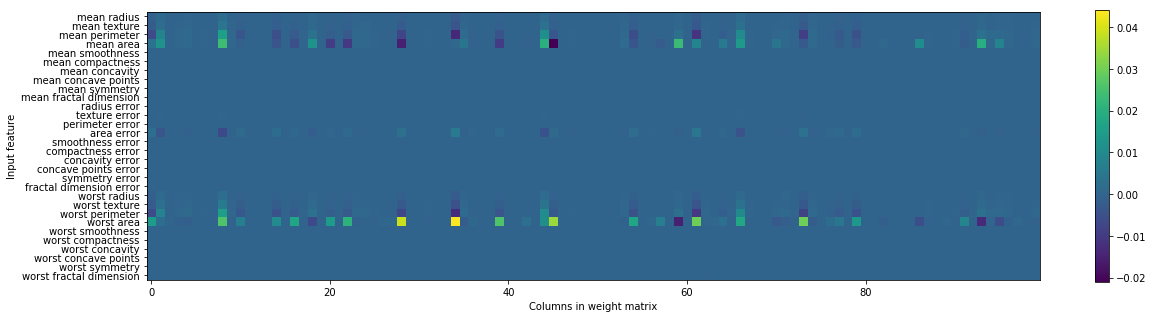

In [85]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation="none",cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

Light colors represent large positive valuew, while dark colors represent negative values.